In [3]:

import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data_dir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/param_search'

In [24]:
    tmp_data = pd.DataFrame()
    tmp_data['param'] = param_name
    tmp_data['acc'] = data['accuracy'].mean()

In [27]:
tmp_data['param'] = param_name

In [29]:
param_name

'wisfc_UMAP_mexican_hat_5'

In [22]:

params =glob.glob(os.path.join(data_dir, '*'))

acc_data = pd.DataFrame()
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])
    cond =os.path.join(p, 'intact.csv')
    data = pd.read_csv(cond)
    tmp_data = pd.DataFrame()
    tmp_data['param'] = param_name
    tmp_data['acc'] = data['accuracy'].mean()
    if acc_data.empty:
        acc_data = tmp_data
    else:
        acc_data = acc_data.append(tmp_data)




In [23]:
acc_data

,param,acc


In [2]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots()
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1.75, 0.75), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
figdir = '../figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

In [4]:
step_size = '1'

In [11]:
resultsdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_PCA_mexican_hat_5/level_5'

In [12]:
#resultsdir = resultsdir + '_' + step_size

## find maximum level computed for optimization

In [13]:
max_level = int(os.path.basename(os.path.splitext(resultsdir)[0]).split('_')[1])

## compile to one dataframe

In [14]:
conds =glob.glob(os.path.join(resultsdir, '*.csv'))

In [15]:
conds

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_PCA_mexican_hat_5/level_5/intact.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_PCA_mexican_hat_5/level_5/paragraph.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_PCA_mexican_hat_5/level_5/rest.csv',
 '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/wisfc_PCA_mexican_hat_5/level_5/word.csv']

In [16]:
full_data = pd.DataFrame()
for c in conds:
    data = pd.read_csv(c)
    data['cond'] = os.path.basename(os.path.splitext(c)[0])

    if full_data.empty:
        full_data = data
    else:
        full_data = full_data.append(data)

## create column with max level computed

In [17]:
full_data['max_level'] = max_level - full_data.isnull().sum(axis=1)

In [18]:
full_data.head()

,Unnamed: 0,accuracy,error,folds,level,level_0,level_1,level_2,level_3,level_4,level_5,rank,iteration,cond,max_level
0,0,0.300000,0.045633,0,5,1.000000,NaN,NaN,NaN,NaN,NaN,0.986489,0,intact,0
1,0,0.276667,0.038911,0,5,0.412328,0.587672,NaN,NaN,NaN,NaN,0.988600,0,intact,1
2,0,0.290000,0.034144,0,5,0.425369,0.417038,0.157592,NaN,NaN,NaN,0.988944,0,intact,2
3,0,0.296667,0.033111,0,5,0.522327,0.391381,0.000003,0.086289,NaN,NaN,0.988878,0,intact,3
4,0,0.300000,0.036267,0,5,0.607340,0.158042,0.128057,0.105301,0.001261,NaN,0.988322,0,intact,4


In [19]:
melted_temp_df = pd.DataFrame()
melted_temp_df['max_level'] = full_data['max_level']
melted_temp_df['accuracy'] = full_data['accuracy']
melted_temp_df['cond'] = full_data['cond']
melted_temp_df['1 - error'] = 1-full_data['error']

In [20]:
melted_temp_df.head()

,max_level,accuracy,cond,1 - error
0,0,0.300000,intact,0.954367
1,1,0.276667,intact,0.961089
2,2,0.290000,intact,0.965856
3,3,0.296667,intact,0.966889
4,4,0.300000,intact,0.963733


In [21]:
outfile = '/Users/lucyowen/Desktop/timecorr_figs/' + 'accuracy_eps=1e-' + step_size

In [22]:
outfile


'/Users/lucyowen/Desktop/timecorr_figs/accuracy_eps=1e-1'

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

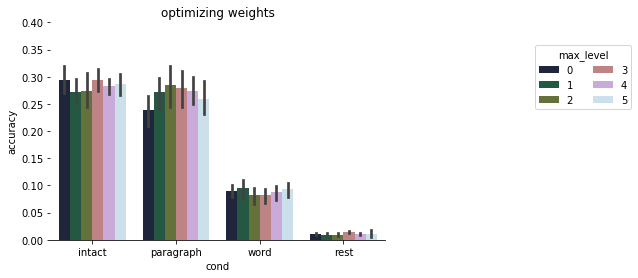

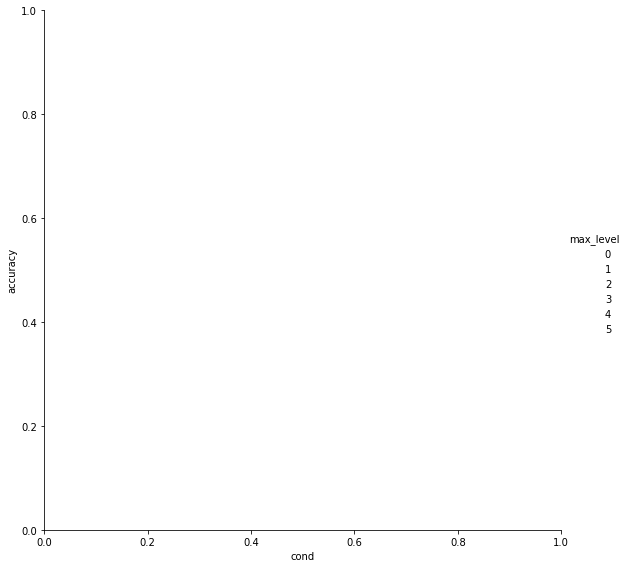

In [23]:
plt.clf()
grouped_barplot(melted_temp_df, 'cond', 'accuracy', 'max_level', ymin=0, ymax=.4, title='optimizing weights', outfile = outfile)

In [24]:
outfile = '/Users/lucyowen/Desktop/timecorr_figs/' + 'error_eps=1e-' + step_size

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


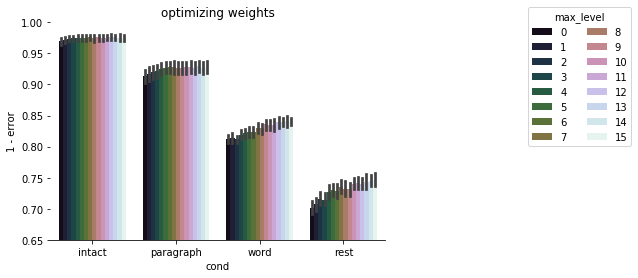

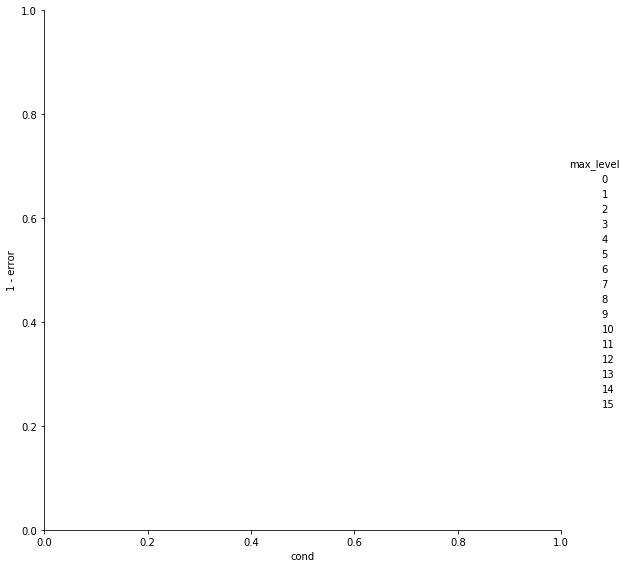

In [28]:
grouped_barplot(melted_temp_df, 'cond', '1 - error', 'max_level', ymin=.65, ymax=1, title='optimizing weights', outfile = outfile)